In [38]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random
import seaborn as sns

### Method Of Moments

In [39]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [40]:
simulation = np.genfromtxt('data/output.csv', delimiter=',')
simulation.shape

(20000,)

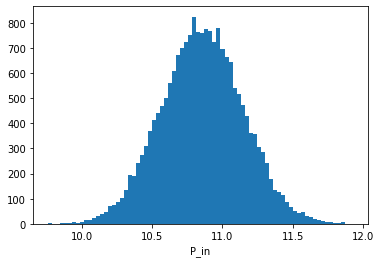

In [43]:
# Plot historgram
plt.hist(simulation, bins = 'auto')
plt.xlabel('P_in')
plt.show()

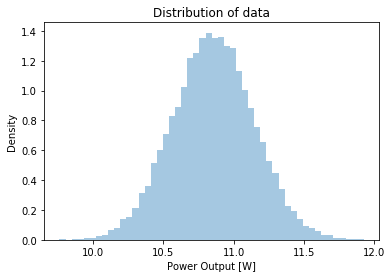

In [44]:
test = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel = "Power Output [W]", label="Density")
test.set_title('Distribution of data')
test.set_ylabel('Density')
plt.savefig('Data/Plots/hist_simulation.png')

In [45]:
from MoM_class import Method_of_Moments

In [46]:
MoM = Method_of_Moments(simulation)

In [47]:
simulation.sort()

**Log Likelihood of FIT**

### Gamma Distribution

In [61]:
params_gamma = MoM.gamma_from_moments()
params_gamma

(14.252039976878569, 9.763923621594225, 0.0766087187562035)

In [48]:
### Log Likelihood
np.sum(np.log(scipy.stats.gamma.pdf(simulation[1:], *params_gamma)))

-4291.132143962865

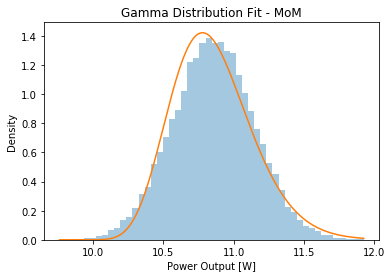

In [62]:
gamma_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.gamma.pdf(simulation, *params_gamma))
gamma_fit.set_title('Gamma Distribution Fit - MoM')
gamma_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Gamma.png')

### Beta Distribution

In [63]:
params_beta = MoM.beta_from_moments()
params_beta

(6.543229995890743, 6.402685874570016, 9.763923621594225, 2.1602092690086625)

In [64]:
np.sum(np.log(scipy.stats.beta.pdf(simulation[1:-1], *params_beta)))

-3730.3395271427107

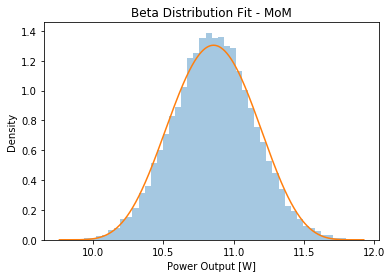

In [65]:
beta_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.beta.pdf(simulation, *params_beta))
beta_fit.set_title('Beta Distribution Fit - MoM')
beta_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Beta.png')

### Normal Distribution

In [66]:
params_normal = MoM.norm_from_moments()
params_normal

(10.855754143885084, 0.289212270506663)

In [67]:
np.sum(np.log(scipy.stats.norm.pdf(simulation[1:-1], *params_normal)))

-3553.577563013328

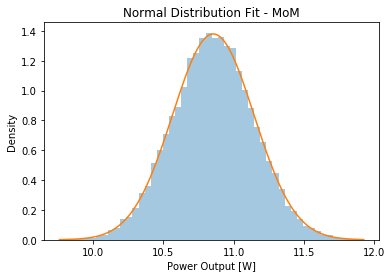

In [68]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
norm_fit.set_title('Normal Distribution Fit - MoM')
norm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Normal.png')

### LogNormal Distribution

In [56]:
params_lognorm = MoM.lognorm_from_moments()
params_lognorm

(0.271691047937462, 9.763923621594225, 1.0522678089321305)

In [57]:
np.sum(np.log(scipy.stats.lognorm.pdf(simulation[1:-1], *params_lognorm)))

-5325.8564613954095

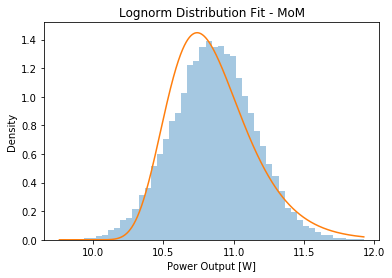

In [58]:
lognorm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
lognorm_fit.set_title('Lognorm Distribution Fit - MoM')
lognorm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Lognorm.png')

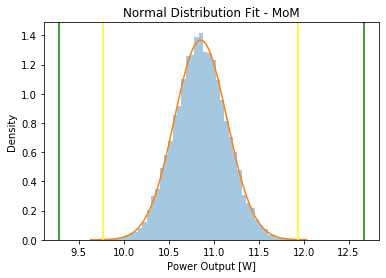

In [44]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
norm_fit.set_title('Normal Distribution Fit - MoM')
norm_fit.set_ylabel('Density')
plt.axvline(x=9.28592305, color='green')
plt.axvline(x=12.66975792, color='green')
plt.axvline(x=9.77066328, color='yellow')
plt.axvline(x=11.94185858, color='yellow')
plt.savefig('Data/Plots/CP.png')
plt.show()


In [ ]:
params_uniform = uniform_from_moments(simulation)
params_uniform

In [ ]:
uniform_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.uniform.pdf(simulation, *params_uniform))
uniform_fit.set_title('Uniform Distribution Fit - MoM')
uniform_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Uniform.png')

In [ ]:
def log_likelihood_foo(data, parameters):
    return np.sum(np.log(dist.pdf(data[1:-1], *parameters)))

def get_parameters(data, method, distribution):
    if method == 'MLE':
        dist = getattr(scipy.stats, distribution)
        return dist.fit(data)
    else: #'MoM'
        MoM = Method_of_Moments(data)
        method_to_call = getattr(Method_of_Moments, distribution + '_from_moments')
        return MoM.method_to_call()